In [110]:
import traceback

try:
    import numpy as np
    import pandas as pd
    import sklearn
    import scipy as sp
    import math
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    import seaborn as sns
    import datetime
    import csv
    import os
    import code
    from matplotlib.backends.backend_pdf import PdfPages, FigureCanvasPdf
    from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
    import time
    from pandas import ExcelWriter
    import tkinter as tk

    from sklearn.neural_network import MLPRegressor
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score

except:
    
    print(traceback.print_exc())
    input("\nError BC.\n")



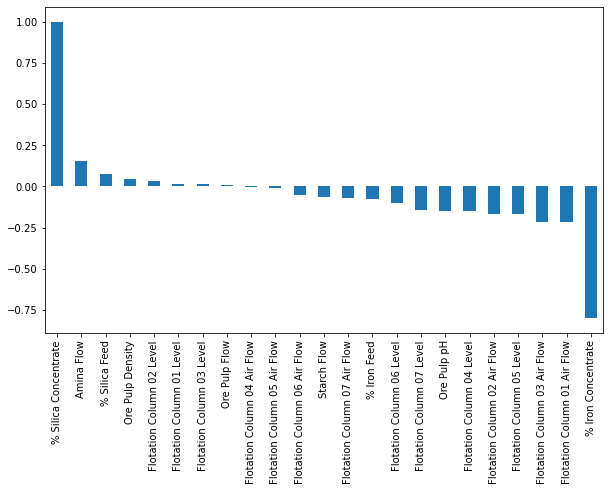

In [14]:
data0 = pd.read_csv(r"data0.csv", decimal = ",")
data0["date"] = data0["date"].astype('datetime64[ns]')

plt.figure(figsize=(10,6))
data0.corr()['% Silica Concentrate'].sort_values(ascending=False).plot(kind='bar')


In [65]:
# Iron feed and Silica feed are (negatively) correlerated (-.97)
# Iron conc. and Silica conc. are (negatively) correlerated (-.80)

important = data0.iloc[:,3:8]
airFlow = data0.iloc[:,8:15]
level = data0.iloc[:,15:22]
pred = data0.iloc[:,22:24]
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737453 non-null  datetime64[ns]
 1   % Iron Feed                   737453 non-null  float64       
 2   % Silica Feed                 737453 non-null  float64       
 3   Starch Flow                   737453 non-null  float64       
 4   Amina Flow                    737453 non-null  float64       
 5   Ore Pulp Flow                 737453 non-null  float64       
 6   Ore Pulp pH                   737453 non-null  float64       
 7   Ore Pulp Density              737453 non-null  float64       
 8   Flotation Column 01 Air Flow  737453 non-null  float64       
 9   Flotation Column 02 Air Flow  737453 non-null  float64       
 10  Flotation Column 03 Air Flow  737453 non-null  float64       
 11  Flotation Col

In [71]:
nor_data0 = data0.iloc[:,1:22]

norm_data0=(nor_data0-nor_data0.min())/(nor_data0.max()-nor_data0.min())

In [72]:
norm_data0

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,0.540799,0.488314,0.479273,0.634233,0.459143,0.639033,0.660348,0.371565,0.388770,0.394444,...,0.838582,0.333166,0.349737,0.432193,0.359466,0.392732,0.542995,0.659121,0.535024,0.718177
1,0.540799,0.488314,0.480047,0.647351,0.498537,0.639423,0.660348,0.374111,0.375311,0.395967,...,0.838582,0.332679,0.339555,0.424473,0.353963,0.403231,0.551733,0.647538,0.534199,0.666028
2,0.540799,0.488314,0.483071,0.655564,0.552439,0.639812,0.660348,0.374222,0.362077,0.393044,...,0.838582,0.339354,0.334583,0.423560,0.417646,0.405428,0.554825,0.624040,0.537706,0.584493
3,0.540799,0.488314,0.483690,0.656791,0.511653,0.640250,0.660348,0.375109,0.395004,0.391639,...,0.838582,0.334254,0.351154,0.425244,0.400237,0.416282,0.548113,0.598483,0.519040,0.520727
4,0.540799,0.488314,0.481520,0.635705,0.566263,0.640639,0.660348,0.376551,0.383298,0.390820,...,0.838582,0.331829,0.339200,0.425244,0.391719,0.426350,0.562510,0.581157,0.530074,0.516620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,0.304253,0.682144,0.430292,0.400473,0.243466,0.422409,0.401374,0.639410,0.615577,0.653055,...,0.555912,0.866749,0.688102,0.340705,0.355810,0.980522,0.495069,0.649867,0.535001,0.498486
737449,0.304253,0.682144,0.427287,0.465518,0.204992,0.422088,0.400984,0.642783,0.630978,0.654779,...,0.591032,0.774083,0.273327,0.353811,0.313611,0.970531,0.494397,0.667266,0.399901,0.517978
737450,0.304253,0.682144,0.427318,0.519854,0.170952,0.421168,0.400564,0.646054,0.658453,0.654779,...,0.559416,0.771690,0.215034,0.364180,0.305037,0.974724,0.496625,0.661400,0.331837,0.531998
737451,0.304253,0.682144,0.184774,0.501897,0.205864,0.420253,0.400144,0.640448,0.631376,0.647104,...,0.522377,0.892492,0.658042,0.358862,0.414257,0.986548,0.473018,0.659212,0.340693,0.533723


In [82]:
X_0 = norm_data0
y_0 = data0["% Silica Concentrate"]

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
0,0.540799,0.488314,0.479273,0.634233,0.459143,0.639033,0.660348,0.371565,0.388770,0.394444,...,0.838582,0.333166,0.349737,0.432193,0.359466,0.392732,0.542995,0.659121,0.535024,0.718177
1,0.540799,0.488314,0.480047,0.647351,0.498537,0.639423,0.660348,0.374111,0.375311,0.395967,...,0.838582,0.332679,0.339555,0.424473,0.353963,0.403231,0.551733,0.647538,0.534199,0.666028
2,0.540799,0.488314,0.483071,0.655564,0.552439,0.639812,0.660348,0.374222,0.362077,0.393044,...,0.838582,0.339354,0.334583,0.423560,0.417646,0.405428,0.554825,0.624040,0.537706,0.584493
3,0.540799,0.488314,0.483690,0.656791,0.511653,0.640250,0.660348,0.375109,0.395004,0.391639,...,0.838582,0.334254,0.351154,0.425244,0.400237,0.416282,0.548113,0.598483,0.519040,0.520727
4,0.540799,0.488314,0.481520,0.635705,0.566263,0.640639,0.660348,0.376551,0.383298,0.390820,...,0.838582,0.331829,0.339200,0.425244,0.391719,0.426350,0.562510,0.581157,0.530074,0.516620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,0.304253,0.682144,0.430292,0.400473,0.243466,0.422409,0.401374,0.639410,0.615577,0.653055,...,0.555912,0.866749,0.688102,0.340705,0.355810,0.980522,0.495069,0.649867,0.535001,0.498486
737449,0.304253,0.682144,0.427287,0.465518,0.204992,0.422088,0.400984,0.642783,0.630978,0.654779,...,0.591032,0.774083,0.273327,0.353811,0.313611,0.970531,0.494397,0.667266,0.399901,0.517978
737450,0.304253,0.682144,0.427318,0.519854,0.170952,0.421168,0.400564,0.646054,0.658453,0.654779,...,0.559416,0.771690,0.215034,0.364180,0.305037,0.974724,0.496625,0.661400,0.331837,0.531998
737451,0.304253,0.682144,0.184774,0.501897,0.205864,0.420253,0.400144,0.640448,0.631376,0.647104,...,0.522377,0.892492,0.658042,0.358862,0.414257,0.986548,0.473018,0.659212,0.340693,0.533723


In [126]:
X_1 = X_0.sample(n = int(len(X_0)/3))
y_1 = y_0[X_1.index]
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state = 69)

In [156]:
regr = MLPRegressor(random_state=69, hidden_layer_sizes = (100,100), activation = 'relu', solver = 'adam',learning_rate = 'invscaling', max_iter = 1000)
regr.fit(X_train, y_train)



MLPRegressor(hidden_layer_sizes=(100, 100), learning_rate='invscaling',
             max_iter=1000, random_state=69)

In [157]:
y_pred=regr.predict(X_test)

In [158]:
mean_squared_error(y_test, y_pred) , r2_score(y_test, y_pred)

(0.41714496246122074, 0.6706661853012507)